# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['albany',
 'puerto ayora',
 'cape town',
 'davila',
 'luderitz',
 'butaritari',
 'grand centre',
 'portland',
 'hilo',
 'umzimvubu',
 'itoman',
 'mount isa',
 'rikitea',
 'ushuaia',
 'east london',
 'victoria',
 'san patricio',
 'bluff',
 'kachikau',
 'busselton',
 'arraial do cabo',
 'illoqqortoormiut',
 'kampong thum',
 'lompoc',
 'vao',
 'longyearbyen',
 'ocos',
 'buala',
 'hasaki',
 'port elizabeth',
 'barentsburg',
 'hithadhoo',
 'jamestown',
 'new norfolk',
 'bengkulu',
 'vaini',
 'aklavik',
 'kahului',
 'punta arenas',
 'usevya',
 'hermanus',
 'buluang',
 'airai',
 'burnie',
 'shaygino',
 'mitsamiouli',
 'murray bridge',
 'san bartolome de tirajana',
 'kapaa',
 'hobart',
 'polyarnyy',
 'coquimbo',
 'mount gambier',
 'tommot',
 'ancud',
 'mataura',
 'tuktoyaktuk',
 'laramie',
 'barrow',
 'berdyuzhye',
 'belushya guba',
 'yellowknife',
 'antonovo',
 'mar del plata',
 'kelvington',
 'avarua',
 'gushikawa',
 'leningradskiy',
 'upernavik',
 'miri',
 'torbay',
 'rio grande',
 'fortun

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
#city_test = random.sample(cities, k=60)
city_test = cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

cities1 = []
temp = []
humidity = []
clouds = []
windspeed = []
lats = []

for city in city_test:
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    try:
        url_city=(query_url).replace(" ","+")
        response=requests.get(url_city).json()
        cities1.append(response["name"])
        temp.append(response['main']["temp"])
        humidity.append(response['main']["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response['wind']["speed"])
        lats.append(response["coord"]["lat"])
        print(f'Processing number {(city_test.index(city)+1)}, which is {city}')
    except:
        print(f'Processing number {(city_test.index(city)+1)}, which is {city} and has no information')

Processing number 1, which is albany
Processing number 2, which is puerto ayora
Processing number 3, which is cape town
Processing number 4, which is davila
Processing number 5, which is luderitz
Processing number 6, which is butaritari
Processing number 7, which is grand centre and has no information
Processing number 8, which is portland
Processing number 9, which is hilo
Processing number 10, which is umzimvubu and has no information
Processing number 11, which is itoman
Processing number 12, which is mount isa
Processing number 13, which is rikitea
Processing number 14, which is ushuaia
Processing number 15, which is east london
Processing number 16, which is victoria
Processing number 17, which is san patricio
Processing number 18, which is bluff
Processing number 19, which is kachikau and has no information
Processing number 20, which is busselton
Processing number 21, which is arraial do cabo
Processing number 22, which is illoqqortoormiut and has no information
Processing numbe

Processing number 188, which is abnub
Processing number 189, which is bato
Processing number 190, which is ilulissat
Processing number 191, which is ambilobe
Processing number 192, which is kaeo
Processing number 193, which is faanui
Processing number 194, which is kochevo
Processing number 195, which is saint-philippe
Processing number 196, which is nikolskoye
Processing number 197, which is esmeraldas
Processing number 198, which is ahipara
Processing number 199, which is pevek
Processing number 200, which is jinchang
Processing number 201, which is dunmore town
Processing number 202, which is saint-joseph
Processing number 203, which is grand gaube
Processing number 204, which is santa cruz
Processing number 205, which is attawapiskat and has no information
Processing number 206, which is rio gallegos
Processing number 207, which is ratnapura
Processing number 208, which is sur
Processing number 209, which is ponta do sol
Processing number 210, which is lorengau
Processing number 21

Processing number 379, which is phuket
Processing number 380, which is pendleton
Processing number 381, which is atar
Processing number 382, which is kutum
Processing number 383, which is machilipatnam
Processing number 384, which is ust-kamchatsk and has no information
Processing number 385, which is perth
Processing number 386, which is payo
Processing number 387, which is port hedland
Processing number 388, which is ugoofaaru
Processing number 389, which is damghan
Processing number 390, which is clyde river
Processing number 391, which is juneau
Processing number 392, which is siedlce
Processing number 393, which is otradnoye
Processing number 394, which is tessalit
Processing number 395, which is los llanos de aridane
Processing number 396, which is northam
Processing number 397, which is santa maria
Processing number 398, which is haines junction
Processing number 399, which is mahadday weyne and has no information
Processing number 400, which is cerrito
Processing number 401, wh

Processing number 571, which is sambava
Processing number 572, which is piterka
Processing number 573, which is popondetta
Processing number 574, which is lazaro cardenas
Processing number 575, which is bogovarovo
Processing number 576, which is yichun
Processing number 577, which is rodrigues alves
Processing number 578, which is nabire
Processing number 579, which is roebourne
Processing number 580, which is evensk
Processing number 581, which is kaabong
Processing number 582, which is escuintla
Processing number 583, which is cefalu
Processing number 584, which is saint-augustin
Processing number 585, which is moa
Processing number 586, which is tarudant and has no information
Processing number 587, which is belvedere park
Processing number 588, which is yomitan and has no information
Processing number 589, which is hovd


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
CitiesDF = pd.DataFrame({"City": cities1,
                        "Temperature": temp,
                        "Humidity": humidity,
                        "Clouds" : clouds,
                        "Windspeed": windspeed,
                        "Latitude": lats
                         })
CitiesDF.to_csv("CitiesDF.csv", index=False)
CitiesDF

,City,Temperature,Humidity,Clouds,Windspeed,Latitude
0,Albany,16.55,63,75,6.20,42.65
1,Puerto Ayora,27.11,69,20,5.70,-0.74
2,Cape Town,15.21,77,0,5.10,-33.93
3,Davila,29.00,79,75,1.00,18.47
4,Luderitz,15.00,77,0,7.70,-26.65
5,Butaritari,28.68,76,68,5.63,3.07
6,Portland,16.83,37,20,5.70,45.52
7,Hilo,23.94,61,75,5.70,19.71
8,Itoman,24.26,88,40,2.60,26.12
9,Mount Isa,29.00,32,0,5.70,-20.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

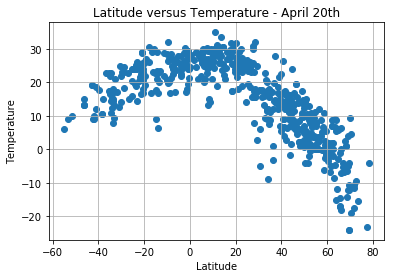

In [55]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Temperature"])
plt.title("Latitude versus Temperature - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig('Lat_v_Temp.png')

#### Latitude vs. Humidity Plot

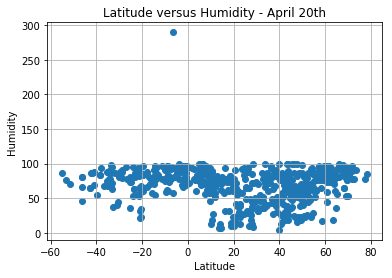

In [56]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Humidity"])
plt.title("Latitude versus Humidity - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig('Lat_v_Humidity.png')

#### Latitude vs. Cloudiness Plot

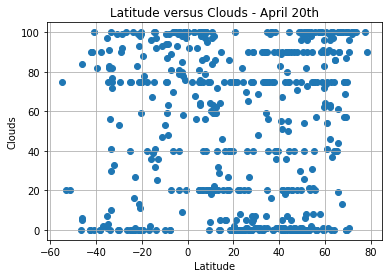

In [57]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Clouds"])
plt.title("Latitude versus Clouds - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid(True)
plt.savefig('Lat_v_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

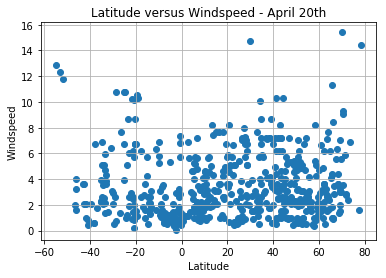

In [58]:
plt.scatter(CitiesDF["Latitude"], CitiesDF["Windspeed"])
plt.title("Latitude versus Windspeed - April 20th")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid(True)
plt.savefig('Lat_v_Windspeed.png')